In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [13]:
from matplotlib.projections import axes
def show_cross_play(result_matrix, title=""):
    table = np.around(result_matrix, decimals=2)

    fig, ax = plt.subplots()
    im = ax.imshow(table)

    ax.set_xticks(np.arange(0, len(table[0]), 5))
    ax.set_yticks(np.arange(0, len(table), 5))

      


    plt.xlabel("SP")
    plt.ylabel("SP")

    cbar = plt.colorbar(im)
    cbar.set_label('Avg. cumulative reward')

    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")



    ax.set_title(title)
    fig.tight_layout()
    # plt.savefig(f"MLP_OFF_DIAG_TEST.png", dpi=300)
    # file_name = f"{os.environ['PROJDIR']}/diverse_population/visualisation/{layout_name}/" + group_name + ('' if deterministic else '_STOCH')
    # file_name = file_name + eval_env + ".png"
    plt.show()

def show_subplots(matrices, titles):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
    axes[2, 1].remove()
    axes_coordinates = [(0,0), (0,1), (1,0), (1,1), (2,0)]
    # axes_coordinates = [(0,0), (1,0), (2,0), (3,0), (4,0)]

    for matrix, title, (ax_x, ax_y) in zip (matrices,titles, axes_coordinates):      
      table = np.around(matrix, decimals=2)
      im = axes[ax_x,ax_y].imshow(table)

      axes[ax_x,ax_y].set_xticks(np.arange(0, len(table[0]), 5))
      axes[ax_x,ax_y].set_yticks(np.arange(0, len(table), 1))
      yticks = []
      for i in range(3):
        yticks.append(f"{i}(SP)")
      for i in range(3,11):
        yticks.append(f"{i}(POP)")
        
      for i in range(11,13):
        yticks.append(f"{i}(POP-F)")
        

      axes[ax_x,ax_y].set_yticklabels(yticks)

      axes[ax_x,ax_y].set_xlabel("SP Eval set")
      axes[ax_x,ax_y].set_ylabel("Population")
      plt.xlabel("SP eval set")
      plt.ylabel("Population")

      cbar = plt.colorbar(im, ax=axes[ax_x,ax_y])
      cbar.set_label('Avg. cumulative reward')

      plt.setp(axes[ax_x,ax_y].get_xticklabels(), rotation=0, ha="right",
              rotation_mode="anchor")
      axes[ax_x,ax_y].set_title(title)


    fig.tight_layout()
    plt.show()


def remove_daigonal(table):
  return table[~np.eye(table.shape[0],dtype=bool)].reshape(table.shape[0],-1)

def show_sorted_cross_play(matrices, legends, title="", remove_diag=False):
    labels = []
    for matrix,legend in zip(matrices,legends):

      table = np.around(matrix, decimals=2)
      if remove_diag:
        table = remove_daigonal(table)
      table = np.sort(table)

      color = None
      if "SP" in legend:
        color = 'black'
        # ax = plt.plot(range(len(table[0])), np.mean(table, axis=0), label=legend, color=color)
        ax = plt.plot(range(len(table[0])), np.quantile(table, 0.15, axis=0), label=legend, color=color)        
        continue

      # ax = plt.plot(range(len(table[0])), np.mean(table, axis=0), label=legend, color=color)
      ax = plt.plot(range(len(table[0])), np.quantile(table, 0.15, axis=0), label=legend, color=color)
    

      # plt.fill_between(x=range(len(table[0])), y1=np.quantile(table,0.25, axis=0), y2=np.quantile(table,0.75, axis=0), alpha=0.25)
      plt.fill_between(x=range(len(table[0])), y1=np.quantile(table,0.0, axis=0), y2=np.quantile(table,0.30, axis=0), alpha=0.25)      
    

    plt.xlabel("Ordered evaluation results")
    percentil = np.arange(0, 1.01, 0.1)
    plt.xticks((len(table[0])-1) * percentil, map(str, np.round(percentil,1)))
    plt.ylabel("Average cummulative reward")
    plt.legend()

    plt.title(title)
    plt.savefig(f"CounterCircuitFSTupleOrderedQ15.png", dpi=300)
    plt.show()



def show_box_plot_averages(matrices, labels):
  fig1, ax1 = plt.subplots()
  ax1.set_xlabel('Experiments')
  ax1.set_ylabel('Average cummulative reward')
  ax1.set_xticklabels(labels)
  ax1.boxplot(matrices)

  plt.savefig(f"SimpleCnnExperimentsAvg.png", dpi=300)

def get_sorted_pairwise_best(row1, row2):
  row1_sorted = np.sort(row1)
  row2_sorted = np.sort(row2)
  if np.sum(row1_sorted >= row2_sorted) > np.sum(row2_sorted >= row1_sorted):
    return row1
  else:
    return row2



size = 2000

def scale_matrix(matrix):
  extended_matrix = []
  for row in matrix:
    new_row = np.array([])
    row = np.sort(row)
    for pos in range(len(row) - 1):
      new_row = np.concatenate([new_row, np.linspace(row[pos], row[pos+1], size//len(row))])
    extended_matrix.append(new_row)
  return np.array(extended_matrix)

def extract_threshold_values(matrix):
  intereseting_points = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  
  q = np.quantile(matrix, 0.15, axis=0)

  values = []
  for point in intereseting_points:
    values.append(q[int(q.shape[0] * point) - 1])
  
  return values



# Simple CNN SP eval cross-play

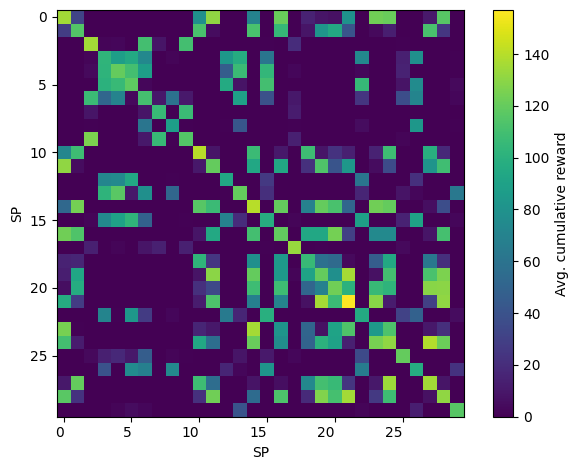

In [6]:
result_matrix = np.loadtxt("SIMPLE_CNN_EVAL_SP_X_SIMPLE_CNN_EVAL_SP_ENVROP0.0")
show_cross_play(result_matrix, "")



# Simple CNN SP sorted

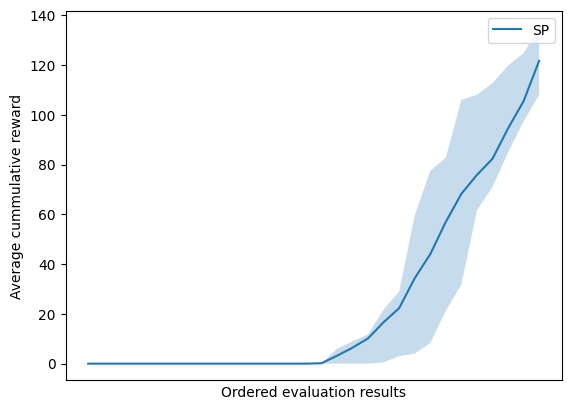

In [8]:
result_matrix = np.loadtxt("SIMPLE_CNN_EVAL_SP_X_SIMPLE_CNN_EVAL_SP_ENVROP0.0")

show_sorted_cross_play([result_matrix], ["SP"],"", remove_diag=False)

# Experiments names and configurations

In [4]:
def simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip):
  return f"POP_SMALL{num}_ROP0.0_MPOP_BRCoef{brcoef}_BRClip{brclip}_LCoef{lcoef}_LClip{lclip}_DSRFalse_PADFalse_X_SP_EVAL2_ROP0.0_ENVROP0.0"

def fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip):
  return f"FS_TUPLE_POP_0{num}_ROP0.0_MPOP_BRCoef{brcoef}_BRClip{brclip}_LCoef{lcoef}_LClip{lclip}_DSRFalse_PADFalse_NSP3_X_FS_TUPLE_SP_EVAL_ENVROP0.0"

def fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip):
  return f"FS_CHANNELS_POP_0{num}_ROP0.0_MPOP_BRCoef{brcoef}_BRClip{brclip}_LCoef{lcoef}_LClip{lclip}_DSRFalse_PADFalse_NSP3_X_FS_CHANNELS_SP_EVAL_ENVROP0.0"

In [5]:
simple_cnn_seeds = [10,11,12,13,14]

simple_cnn_configs = [
    {
      "label": "No divers.",
      "params": (0.0, 0.0, 0.0, 0.0)
    },

    {
      "label": "R0",
      "params": (0.08, 0.025, 0.0, 0.0)
    },

    {
      "label": "R1",
      "params": (0.15, 0.05, 0.0, 0.0)
    },
    {
      "label": "R2",
      "params": (0.1, 0.075, 0.0, 0.0)
    },


    {
      "label": "L0",
      "params": (0.0, 0.0, 0.08, 0.03)
    },
    {
      "label": "L1",
      "params": (0.0, 0.0, 0.12, 0.07)
    },
    {
      "label": "L2",
      "params": (0.0, 0.0, 0.1, 0.15)
    },
        {
      "label": "R1L1",
      "params": (0.1, 0.05, 0.1, 0.05)
    },
]

fs_seeds = [100,101,102]

fs_configs = [
    {
      "label": "No divers.",
      "params": (0.0, 0.0, 0.0, 0.0)
    },

    {
      "label": "R0",
      "params": (0.08, 0.025, 0.0, 0.0)
    },

    {
      "label": "R1",
      "params": (0.15, 0.05, 0.0, 0.0)
    },
    {
      "label": "R2",
      "params": (0.1, 0.075, 0.0, 0.0)
    },

    {
      "label": "L0",
      "params": (0.0, 0.0, 0.08, 0.03)
    },
    {
      "label": "L1",
      "params": (0.0, 0.0, 0.12, 0.07)
    },

    {
      "label": "L2",
      "params": (0.0, 0.0, 0.1, 0.15)
    },
    {
      "label": "R0L0",
      "params": (0.08, 0.02, 0.08, 0.02)
    },
    {
      "label": "R1L1",
      "params": (0.1, 0.04, 0.1, 0.03)
    },
]



# Frame stacking - Channels

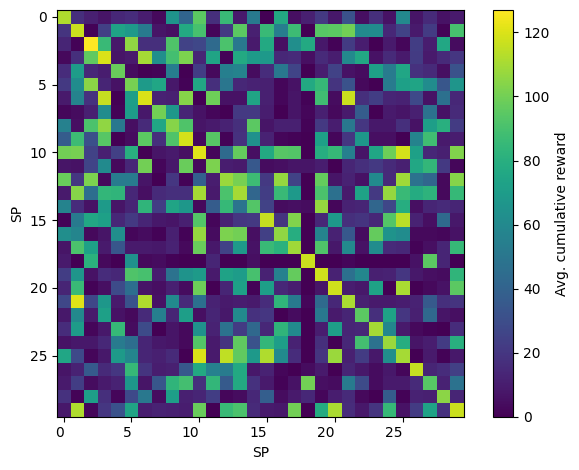

In [11]:
result_matrix = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
show_cross_play(result_matrix, "")



# Frame stacking - Tuple

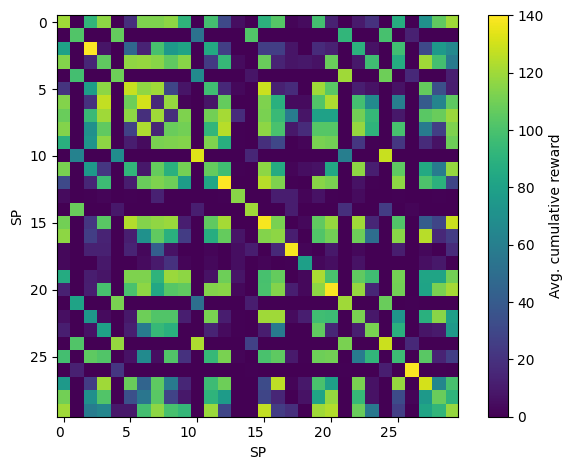

In [12]:
result_matrix = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
show_cross_play(result_matrix, "")

# Frame stacking sorted

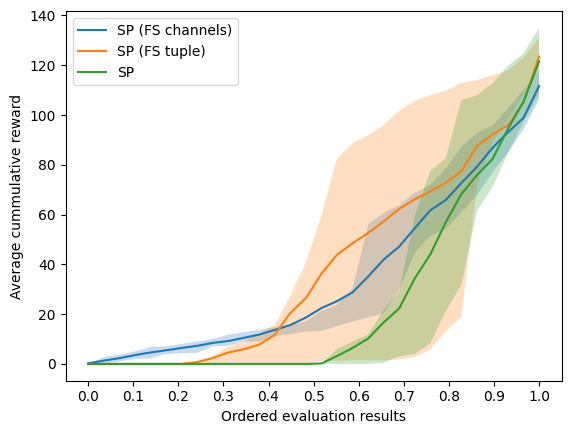

In [7]:
fs_channels = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
fs_tuple = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
cnn = np.loadtxt("SIMPLE_CNN_EVAL_SP_X_SIMPLE_CNN_EVAL_SP_ENVROP0.0")

show_sorted_cross_play([fs_channels, fs_tuple, cnn], ["SP (FS channels)", "SP (FS tuple)", "SP"],"", remove_diag=False)

# FS Channels POP sorted evaluation - all seeds cummulated - best final agent

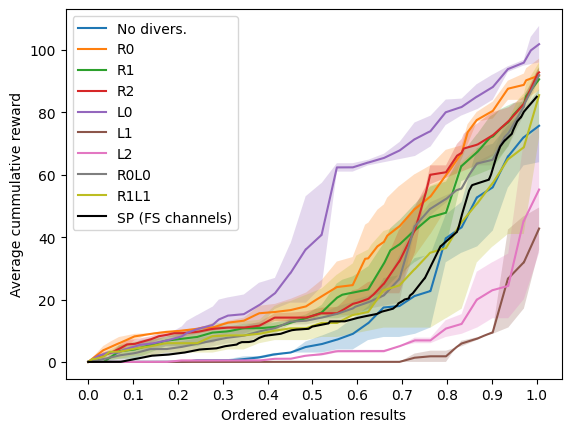

In [12]:
matrices = []
legends = []
counter_circuit_fs_channels_values = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])

  seed_cummulative_result = scale_matrix(seed_cummulative_result)
  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")
  counter_circuit_fs_channels_values.append(extract_threshold_values(seed_cummulative_result))


fs_channels = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
fs_channels = scale_matrix(fs_channels)
counter_circuit_fs_channels_values.append(extract_threshold_values(fs_channels))
matrices.append(fs_channels)
legends.append("SP (FS channels)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# FS Tuple POP sorted evaluation - all seeds cummulated - best final agent

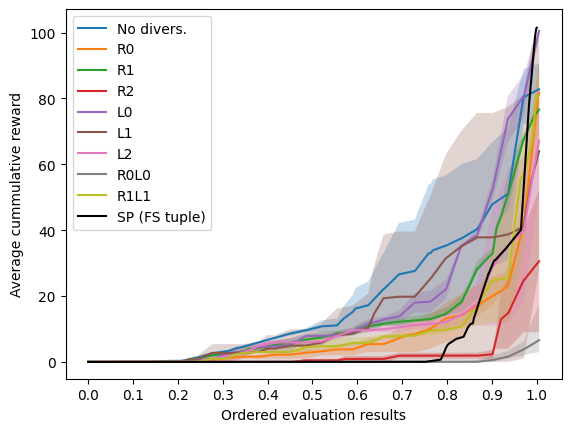

In [14]:
matrices = []
legends = []
counter_circuit_fs_tuple_values = [] 
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    try:
      (brcoef, brclip, lcoef, lclip) = conf["params"]
      eval_name = fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip)
      result_matrix = np.loadtxt(eval_name)
      result_matrix = get_sorted_pairwise_best(result_matrix[11:], result_matrix[12:])
      
      if seed_cummulative_result is None:
        seed_cummulative_result = result_matrix
      else:
        seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])
    except:
      pass

  seed_cummulative_result = scale_matrix(seed_cummulative_result)
  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")
  counter_circuit_fs_tuple_values.append(extract_threshold_values(seed_cummulative_result))


fs_channels = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
fs_channels = scale_matrix(fs_channels)
counter_circuit_fs_tuple_values.append(extract_threshold_values(fs_channels))
matrices.append(fs_channels)
legends.append("SP (FS tuple)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)

In [26]:
# counter_circuit_fs_channels_values
counter_circuit_fs_tuple_values

[[10.19076923076923,
  16.46153846153846,
  26.876923076923077,
  35.70615384615384,
  48.14615384615385,
  82.8],
 [2.9969230769230766,
  4.415384615384616,
  7.6984615384615385,
  13.384615384615383,
  20.215384615384615,
  81.8],
 [7.095384615384615,
  10.184615384615384,
  12.310769230769232,
  15.264615384615386,
  35.4,
  76.6],
 [0.44999999999999996,
  0.8999999999999999,
  1.9,
  1.9,
  4.1038461538461535,
  30.599999999999998],
 [7.9,
  10.084615384615384,
  14.963076923076922,
  24.455384615384617,
  53.96153846153846,
  100.5],
 [5.393076923076922,
  9.242307692307692,
  19.799999999999997,
  32.16461538461538,
  37.86923076923077,
  64.0],
 [6.047692307692308,
  9.6,
  10.693846153846154,
  12.506153846153845,
  29.21538461538461,
  67.2],
 [0.0, 0.0, 0.0, 0.0, 0.6769230769230768, 6.6],
 [4.623076923076923,
  5.75,
  7.819230769230769,
  9.934615384615384,
  24.807692307692307,
  81.0],
 [0.0, 0.0, 0.0, 4.83134328358209, 29.063432835820883, 101.45]]